In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_excel('streams/AEStreamTable2.xlsx')
df.index = df.index + 1  # This shifts the index to start from 1 instead 

In [18]:
df

,Stream Number,Type,Molar Flow Rate [kmol/hr],Tin,Tout,T_diff,Cp (kJ/kmol/K)
1,S2,cold,162.598652,93.790304,150.000000,-56.209696,175.453272
2,S9,cold,309.317662,124.850263,619.999892,-495.149629,226.374457
3,S11,cold,256.000000,20.000000,620.000000,-600.000000,29.584853
4,S12,hot,575.347324,620.000000,2.000000,618.000000,124.000000
5,S15,cold,158.352029,0.547123,150.000000,-149.452877,150.560459
6,S21,cold,500.000000,20.000000,150.000000,-130.000000,29.089416
7,S22,hot,337.018246,150.000000,25.000000,125.000000,139.855395
8,S24,hot,322.000000,25.000000,23.100976,1.899024,149.396949
9,S25,cold,7.497616,24.999994,150.000000,-125.000006,29.392114
10,S27,cold,215.715500,20.000000,100.000000,-80.000000,199.685133


In [22]:
l = len(df['Cp (kJ/kmol/K)'])
# print(l)

D = []
for i in range(1, l+1):
    x = df['Cp (kJ/kmol/K)'][i] * df['T_diff'][i] * df['Molar Flow Rate [kmol/hr]'][i] # Duty [KJ / hr]
    y = x / 360 # Duty [kW]
    D.append(y)
    
# print(D)
# print(len(D))

F = []
for i in range(1, l+1):
    x = D[i-1] / df['T_diff'][i] # Flux [kW / K]
    F.append(x)

# print(F)
# print(len(F))

# Create a new column 'Duty [kW]' and initialize with NaN or some default value
df['Duty [kW]'] = float('nan')
df['Flux [kW / K]'] = float('nan')

# Check if the length of D matches the number of rows in the dataframe
if len(D) == len(df):
    df['Duty [kW]'] = D
else:
    print("The length of the list 'D' does not match the number of rows in the DataFrame.")

if len(F) == len(df):
    df['Flux [kW / K]'] = F

In [23]:
df

,Stream Number,Type,Molar Flow Rate [kmol/hr],Tin,Tout,T_diff,Cp (kJ/kmol/K),Duty [kW],Flux [kW / K]
1,S2,cold,162.598652,93.790304,150.000000,-56.209696,175.453272,-4454.378772,79.245737
2,S9,cold,309.317662,124.850263,619.999892,-495.149629,226.374457,-96308.828121,194.504494
3,S11,cold,256.000000,20.000000,620.000000,-600.000000,29.584853,-12622.870588,21.038118
4,S12,hot,575.347324,620.000000,2.000000,618.000000,124.000000,122472.267121,198.175190
5,S15,cold,158.352029,0.547123,150.000000,-149.452877,150.560459,-9897.746814,66.226539
6,S21,cold,500.000000,20.000000,150.000000,-130.000000,29.089416,-5252.255640,40.401966
7,S22,hot,337.018246,150.000000,25.000000,125.000000,139.855395,16365.909698,130.927278
8,S24,hot,322.000000,25.000000,23.100976,1.899024,149.396949,253.761435,133.627271
9,S25,cold,7.497616,24.999994,150.000000,-125.000006,29.392114,-76.517638,0.612141
10,S27,cold,215.715500,20.000000,100.000000,-80.000000,199.685133,-9572.261837,119.653273


## Net utility usage per interval

We have 20 intervals: $Q_1, Q_2, \dots , Q_{20}$

Let flux of stream i be denoted as $Fl_i [\frac{kW}{K}]$


Let the temperature change in interval $Q_j$ be $\Delta T_{Q_j} [K]$

$
Q_j = \sum_{i = 1}^{14} Fl_i \cdot \Delta T_{Q_j} \cdot \delta_{i, j} 
$


where

$
\delta_{i, j} = 
\left\{
    \begin{array}{lr}
        1, & \text{if } i \in Q_j \\
        0, & \text{if } i \notin Q_j 
    \end{array}
\right\}
$

In [24]:
# Number of streams and intervals
num_streams = 14
num_intervals = 20

# Initialize the delta matrix with zeros
delta_matrix = np.zeros((num_intervals, num_streams))

# Streams in each interval where for example: 1: [9, 11] implies that streams 9 and 11 are in interval 1
streams_in_intervals = {
    1: ['S9', 'S11'],
    2: ['S12', 'S9', 'S11'],
    3: ['S12', 'S2', 'S9', 'S11', 'S15', 'S21', 'S25'],
    4: ['S22', 'S12', 'S2', 'S9', 'S11', 'S15', 'S21', 'S25'],
    5: ['S22', 'S12', 'S2', 'S11', 'S15', 'S21', 'S25'],
    6: ['S22', 'S12', 'S2', 'S11', 'S15', 'S21', 'S25', 'S27'],
    7: ['S22', 'S12', 'S2', 'S28', 'S11', 'S15', 'S21', 'S25', 'S27'],
    8: ['S22', 'S12', 'S2', 'S28', 'S11', 'S15', 'S21', 'S25', 'S27'],
    9: ['S37', 'S22', 'S12', 'S28', 'S11', 'S15', 'S21', 'S25', 'S27'],
    10: ['S37', 'S22', 'S12', 'S28', 'S29', 'S11', 'S15', 'S21', 'S25', 'S27'],
    11: ['S37', 'S22', 'S12', 'S28', 'S29', 'S11', 'S15', 'S21', 'S25', 'S27', 'S32'],
    12: ['S22', 'S12', 'S28', 'S29', 'S11', 'S15', 'S21', 'S25', 'S27', 'S32'],
    13: ['S22', 'S12', 'S28', 'S11', 'S15', 'S21', 'S25', 'S27', 'S32'],
    14: ['S22', 'S12', 'S28', 'S11', 'S15', 'S21', 'S25', 'S27', 'S32'],
    15: ['S22', 'S12', 'S11', 'S15', 'S21', 'S27', 'S32'],
    16: ['S22', 'S12', 'S15', 'S32'],
    17: ['S22', 'S12', 'S15'],
    18: ['S24', 'S12', 'S15'],
    19: ['S12', 'S15'],
    20: ['S12'],
}



In [25]:
# Create a mapping from stream names to their indices
stream_to_index = {stream: idx for idx, stream in enumerate(df['Stream Number'])}

# Function to replace stream names with their indices
def replace_streams_with_indices(streams_in_intervals, stream_to_index):
    new_intervals = {}
    for interval, streams in streams_in_intervals.items():
        new_intervals[interval] = [stream_to_index.get(str(stream), stream) for stream in streams]
    return new_intervals

# Use the function to create the new table
new_streams_in_intervals = replace_streams_with_indices(streams_in_intervals, stream_to_index)

# print(new_streams_in_intervals)

In [26]:
stream_to_index = {stream: idx + 1 for idx, stream in enumerate(df['Stream Number'])}

# Function to replace stream names with their indices
def replace_streams_with_indices(streams_in_intervals, stream_to_index):
    new_intervals = {}
    for interval, streams in streams_in_intervals.items():
        # Replace stream names with their new indices
        new_intervals[interval] = [stream_to_index.get(str(stream), stream) for stream in streams]
    return new_intervals


# Use the function to create the new table
new_streams_in_intervals = replace_streams_with_indices(streams_in_intervals, stream_to_index)


In [27]:
new_streams_in_intervals

{1: [2, 3],
 2: [4, 2, 3],
 3: [4, 1, 2, 3, 5, 6, 9],
 4: [7, 4, 1, 2, 3, 5, 6, 9],
 5: [7, 4, 1, 3, 5, 6, 9],
 6: [7, 4, 1, 3, 5, 6, 9, 10],
 7: [7, 4, 1, 11, 3, 5, 6, 9, 10],
 8: [7, 4, 1, 11, 3, 5, 6, 9, 10],
 9: [14, 7, 4, 11, 3, 5, 6, 9, 10],
 10: [14, 7, 4, 11, 12, 3, 5, 6, 9, 10],
 11: [14, 7, 4, 11, 12, 3, 5, 6, 9, 10, 13],
 12: [7, 4, 11, 12, 3, 5, 6, 9, 10, 13],
 13: [7, 4, 11, 3, 5, 6, 9, 10, 13],
 14: [7, 4, 11, 3, 5, 6, 9, 10, 13],
 15: [7, 4, 3, 5, 6, 10, 13],
 16: [7, 4, 5, 13],
 17: [7, 4, 5],
 18: [8, 4, 5],
 19: [4, 5],
 20: [4]}

In [28]:
temp_differences_intervals = {
    1: 10, 
    2: 60, 
    3: 10, 
    4: 15, 
    5: 25, 
    6: 4, 
    7: 2, 
    8: 8, 
    9: 2, 
    10: 4, 
    11: 10, 
    12: 8, 
    13: 6, 
    14: 31, 
    15: 5,
    16: 4, 
    17: 1, 
    18: 2, 
    19: 12.45, 
    20: 8.55
}

In [29]:
def calculate_Hj_hot(fluxes, temp_changes, streams_in_intervals):
    Hj_ht = {}
    idx = 1
    
    for interval, streams in streams_in_intervals.items():
        Hj = 0
        for stream_number in streams: 
            if df['Type'][stream_number] == 'hot':
                Hj += fluxes[stream_number] * temp_changes[idx]
        
        Hj_ht[interval] = Hj
        idx = idx + 1
        
    return Hj_ht

In [30]:
def calculate_Hj_cold(fluxes, temp_changes, streams_in_intervals):
    Hj_cd = {}
    idx = 1
    
    for interval, streams in streams_in_intervals.items():
        Hj = 0
        for stream_number in streams: 
            if df['Type'][stream_number] == 'cold':
                Hj += fluxes[stream_number] * temp_changes[idx]
        
        Hj_cd[interval] = Hj
        idx = idx + 1
        
    return Hj_cd

In [31]:
def calculate_Qj(fluxes, temp_changes, streams_in_intervals):
    Qj_values = {}
    idx = 1  
    
    for interval, streams in streams_in_intervals.items():
        total_heat_transfer = 0
        for stream_number in streams:
            #print(stream_number)
            if df['Type'][stream_number] == 'cold':
                total_heat_transfer -= fluxes[stream_number] * temp_changes[idx]
            else: 
                total_heat_transfer += fluxes[stream_number] * temp_changes[idx]
        
        Qj_values[interval] = total_heat_transfer
        
        idx = idx + 1  
        
#         print("next")
#         print(idx)
#         print("iter")
        
    return Qj_values


In [32]:
print(f"Net utility for interval 1: {-(df['Flux [kW / K]'][2] + df['Flux [kW / K]'][3]) * 10}")
print(f"Net utility for interval 2: {(df['Flux [kW / K]'][4] - df['Flux [kW / K]'][2] - df['Flux [kW / K]'][3]) * 60}")

Net utility for interval 1: -2155.426116856992
Net utility for interval 2: -1042.0453302086187


In [33]:
# Calculate Qj values
Qj_results = calculate_Qj(df['Flux [kW / K]'], temp_differences_intervals, new_streams_in_intervals)
Qj_results


{1: -2155.426116856992,
 2: -1042.0453302086198,
 3: -2038.5380646790204,
 4: -1093.8979332467518,
 5: 3039.4491289090065,
 6: 7.69876879745874,
 7: -115.96142643636739,
 8: -463.84570574546956,
 9: 124.64598802240141,
 10: 4.400862451569935,
 11: -110.6954402499257,
 12: -417.02011112057386,
 13: 54.57158704941904,
 14: 281.9531997553326,
 15: 348.0640550139814,
 16: 1002.8246722573896,
 17: 262.8759277022324,
 18: 531.1518414404497,
 19: 1642.7606939622167,
 20: 1694.397870358}

## Net utility usage per interval

In [34]:
df1 = pd.DataFrame(Qj_results, index=[0])
df1.index = df1.index + 1 
# print(df1)

In [35]:
# Converting df1 to a one-dimensional NumPy array
one_dim_array = df1.values.ravel()

# If you want to see the array, you can print it
print(one_dim_array)


[-2155.42611686 -1042.04533021 -2038.53806468 -1093.89793325
  3039.44912891     7.6987688   -115.96142644  -463.84570575
   124.64598802     4.40086245  -110.69544025  -417.02011112
    54.57158705   281.95319976   348.06405501  1002.82467226
   262.8759277    531.15184144  1642.76069396  1694.39787036]


In [36]:
# Creating a DataFrame from the provided utility data
data = {
    "Interval": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "Net Utility [kW]": one_dim_array
}
df2 = pd.DataFrame(data)
df2.index = df2.index + 1 

In [37]:
df2

,Interval,Net Utility [kW]
1,1,-2155.426117
2,2,-1042.045330
3,3,-2038.538065
4,4,-1093.897933
5,5,3039.449129
6,6,7.698769
7,7,-115.961426
8,8,-463.845706
9,9,124.645988
10,10,4.400862


In [38]:
l = len(df2)
# print(l)

C = []
for i in range(1, l+1):
    if df2['Net Utility [kW]'][i] < 0: 
        C.append('Deficit')
    else: 
        C.append('Surplus')

# print(C)

# Create a new column 'Surplus or deficit' and initialize with NaN or some default value
df2['Surplus or deficit'] = float('nan')

# Check if the length of D matches the number of rows in the dataframe
if len(C) == len(df2):
    df2['Surplus or deficit'] = C
else:
    print("The length of the list 'C' does not match the number of rows in the DataFrame.")


In [39]:
df2

,Interval,Net Utility [kW],Surplus or deficit
1,1,-2155.426117,Deficit
2,2,-1042.045330,Deficit
3,3,-2038.538065,Deficit
4,4,-1093.897933,Deficit
5,5,3039.449129,Surplus
6,6,7.698769,Surplus
7,7,-115.961426,Deficit
8,8,-463.845706,Deficit
9,9,124.645988,Surplus
10,10,4.400862,Surplus


In [40]:
df6 = df2[df2['Interval'] > 4].copy()


df6['Cumulative Utility [kW]'] = df6['Net Utility [kW]'].cumsum()

df6

,Interval,Net Utility [kW],Surplus or deficit,Cumulative Utility [kW]
5,5,3039.449129,Surplus,3039.449129
6,6,7.698769,Surplus,3047.147898
7,7,-115.961426,Deficit,2931.186471
8,8,-463.845706,Deficit,2467.340766
9,9,124.645988,Surplus,2591.986754
10,10,4.400862,Surplus,2596.387616
11,11,-110.695440,Deficit,2485.692176
12,12,-417.020111,Deficit,2068.672065
13,13,54.571587,Surplus,2123.243652
14,14,281.953200,Surplus,2405.196851


# Procedure for hot curve
Let $T_0$ be the coldest temperature of any hot stream as the base condition and let $H_0$ = 0. 

For each interval i from 1 to N, the number of intervals, starting at the bottom temperature and working upwards: 


Let $T_i$ be the top temperature of interval i

Let $H_i$ be the cumulative heat available: the sum of all the hot streams in interval i plus $H_{i-1}$. 

Plot the curve defined by the set of points: $\{(H_i, T_i), i = 0, \dots, N\}$

In [41]:
print(f"Hot utility for interval 2: {(df['Flux [kW / K]'][4] ) * 60}")
print(f"Hot utility for interval 3: {(df['Flux [kW / K]'][4] ) * 10}")
print(f"Hot utility for interval 4: {(df['Flux [kW / K]'][4] + df['Flux [kW / K]'][7] ) * 15}")


Hot utility for interval 2: 11890.511370933333
Hot utility for interval 3: 1981.7518951555555
Hot utility for interval 4: 4936.537006505113


In [42]:
# Calculate Hj_hot values
Hj_ht_results = calculate_Hj_hot(df['Flux [kW / K]'], temp_differences_intervals, new_streams_in_intervals)
Hj_ht_results

{1: 0,
 2: 11890.511370933333,
 3: 1981.7518951555555,
 4: 4936.537006505112,
 5: 8227.561677508522,
 6: 1316.4098684013634,
 7: 658.2049342006817,
 8: 2632.8197368027268,
 9: 740.3208739308401,
 10: 1480.6417478616802,
 11: 3701.6043696542006,
 12: 2632.8197368027268,
 13: 1974.614802602045,
 14: 10202.176480110566,
 15: 1645.5123355017042,
 16: 1316.4098684013634,
 17: 329.10246710034085,
 18: 663.6049202366667,
 19: 2467.2811094686667,
 20: 1694.397870358}

In [43]:
print(f"Cold utility for interval 1: {(df['Flux [kW / K]'][2] + df['Flux [kW / K]'][3]) * 10}")
print(f"Cold utility for interval 2: {(df['Flux [kW / K]'][2] + df['Flux [kW / K]'][3]) * 60}")
print(f"Cold utility for interval 3: {(df['Flux [kW / K]'][2] + df['Flux [kW / K]'][3] + df['Flux [kW / K]'][1] + df['Flux [kW / K]'][5] + df['Flux [kW / K]'][6] + df['Flux [kW / K]'][9]) * 10}")


Cold utility for interval 1: 2155.426116856992
Cold utility for interval 2: 12932.556701141952
Cold utility for interval 3: 4020.289959834576


In [59]:
# Calculate Hj_hot values
Hj_cd_results = calculate_Hj_cold(df['Flux [kW / K]'], temp_differences_intervals, new_streams_in_intervals)

Hj_cd_results

{1: 2155.426116856992,
 2: 12932.556701141952,
 3: 4020.289959834576,
 4: 6030.434939751864,
 5: 5188.112548599515,
 6: 1308.7110996039046,
 7: 774.1663606370491,
 8: 3096.6654425481966,
 9: 615.6748859084387,
 10: 1476.2408854101102,
 11: 3812.299809904126,
 12: 3049.8398479233006,
 13: 1920.043215552626,
 14: 9920.223280355234,
 15: 1297.448280487723,
 16: 313.58519614397375,
 17: 66.22653939810844,
 18: 132.4530787962169,
 19: 824.52041550645,
 20: 0}

In [60]:
# Assuming Hj_ht_results.values() returns the hot utility values in the correct order
data_hot = {
    "Interval": [i for i in range(1, 21)],
    "Hot utility": list(Hj_ht_results.values())  # Ensure this is a list for DataFrame creation
}

df_hot = pd.DataFrame(data_hot)
df_hot.index = df_hot.index + 1

# Reverse the DataFrame order
df_hot_reversed = df_hot.iloc[::-1].reset_index(drop=True)
df_hot_reversed.index = df_hot_reversed.index + 1

df_hot

,Interval,Hot utility
1,1,0.000000
2,2,11890.511371
3,3,1981.751895
4,4,4936.537007
5,5,8227.561678
6,6,1316.409868
7,7,658.204934
8,8,2632.819737
9,9,740.320874
10,10,1480.641748


In [61]:
df_hot_reversed

,Interval,Hot utility
1,20,1694.397870
2,19,2467.281109
3,18,663.604920
4,17,329.102467
5,16,1316.409868
6,15,1645.512336
7,14,10202.176480
8,13,1974.614803
9,12,2632.819737
10,11,3701.604370


In [62]:
Shifted_intervals = [i for i in range(0, 21)]
Shifted_temperatures = [2, 10.55, 23, 25, 26, 30, 35, 
                        66, 72, 80, 90, 94, 96, 104, 
                        106, 110, 135, 150, 160, 620, 630]

Shifted_hot_utility = df_hot_reversed['Hot utility'].values.ravel()
Shifted_hot_utility = np.insert(Shifted_hot_utility, 0, 0)

In [63]:
data_shifted_hot = {
    "i": Shifted_intervals, 
    "H_i": Shifted_hot_utility,
    "T_i": Shifted_temperatures
}

df_shifted_hot = pd.DataFrame(data_shifted_hot)
df_shifted_hot.index = df_shifted_hot.index + 1

In [64]:
df_shifted_hot

,i,H_i,T_i
1,0,0.000000,2.00
2,1,1694.397870,10.55
3,2,2467.281109,23.00
4,3,663.604920,25.00
5,4,329.102467,26.00
6,5,1316.409868,30.00
7,6,1645.512336,35.00
8,7,10202.176480,66.00
9,8,1974.614803,72.00
10,9,2632.819737,80.00


In [65]:
df_shifted_hot['Cumulative Utility [kW]'] = df_shifted_hot['H_i'].cumsum()

In [66]:
df_shifted_hot

,i,H_i,T_i,Cumulative Utility [kW]
1,0,0.000000,2.00,0.000000
2,1,1694.397870,10.55,1694.397870
3,2,2467.281109,23.00,4161.678980
4,3,663.604920,25.00,4825.283900
5,4,329.102467,26.00,5154.386367
6,5,1316.409868,30.00,6470.796236
7,6,1645.512336,35.00,8116.308571
8,7,10202.176480,66.00,18318.485051
9,8,1974.614803,72.00,20293.099854
10,9,2632.819737,80.00,22925.919591


# Procedure for cold curve

Essentially the same procedure as for the hot curve except that the starting enthalpy is the minimum cooling requirement identified earlier using the cascade diagram. 

Plot the curve defined by the set of points
$\{(C_i, T_i), i = 0, \dots , N \}$

Different starting values will shift the curve left (for smaller starting value) or right relative to the hot curve. 

The starting value is directly related to the value of $\Delta T_{min}$ so that the bigger that value, the more the cold curve is shifted to the right relative to the hot curve. 


In [67]:
7887.271912

7887.271912

In [68]:
# Assuming Hj_cd_results.values() returns the cold utility values in the correct order
data_cold = {
    "Interval": [i for i in range(1, 21)],
    "Cold utility": list(Hj_cd_results.values())  # Ensure this is a list for DataFrame creation
}

df_cold = pd.DataFrame(data_cold)
df_cold.index = df_cold.index + 1

# Reverse the DataFrame order
df_cold_reversed = df_cold.iloc[::-1].reset_index(drop=True)
df_cold_reversed.index = df_cold_reversed.index + 1

df_cold

,Interval,Cold utility
1,1,2155.426117
2,2,12932.556701
3,3,4020.289960
4,4,6030.434940
5,5,5188.112549
6,6,1308.711100
7,7,774.166361
8,8,3096.665443
9,9,615.674886
10,10,1476.240885


In [69]:
df_cold_reversed

,Interval,Cold utility
1,20,0.000000
2,19,824.520416
3,18,132.453079
4,17,66.226539
5,16,313.585196
6,15,1297.448280
7,14,9920.223280
8,13,1920.043216
9,12,3049.839848
10,11,3812.299810


In [70]:
Shifted_intervals_2 = [i for i in range(0, 21)]
Shifted_temperatures_2 = [i - 10 for i in Shifted_temperatures]

Shifted_cold_utility = df_cold_reversed['Cold utility'].values.ravel()
Shifted_cold_utility = np.insert(Shifted_cold_utility, 0, 7887.271912)

In [71]:
data_shifted_cold = {
    "i": Shifted_intervals_2, 
    "C_i": Shifted_cold_utility,
    "T_i ": Shifted_temperatures_2
}

df_shifted_cold = pd.DataFrame(data_shifted_cold)
df_shifted_cold.index = df_shifted_cold.index + 1

In [72]:
df_shifted_cold

,i,C_i,T_i
1,0,7887.271912,-8.00
2,1,0.000000,0.55
3,2,824.520416,13.00
4,3,132.453079,15.00
5,4,66.226539,16.00
6,5,313.585196,20.00
7,6,1297.448280,25.00
8,7,9920.223280,56.00
9,8,1920.043216,62.00
10,9,3049.839848,70.00


In [73]:
df_shifted_cold['Cumulative Utility [kW]'] = df_shifted_cold['C_i'].cumsum()

In [74]:
df_shifted_cold

,i,C_i,T_i,Cumulative Utility [kW]
1,0,7887.271912,-8.00,7887.271912
2,1,0.000000,0.55,7887.271912
3,2,824.520416,13.00,8711.792328
4,3,132.453079,15.00,8844.245406
5,4,66.226539,16.00,8910.471946
6,5,313.585196,20.00,9224.057142
7,6,1297.448280,25.00,10521.505422
8,7,9920.223280,56.00,20441.728703
9,8,1920.043216,62.00,22361.771918
10,9,3049.839848,70.00,25411.611766


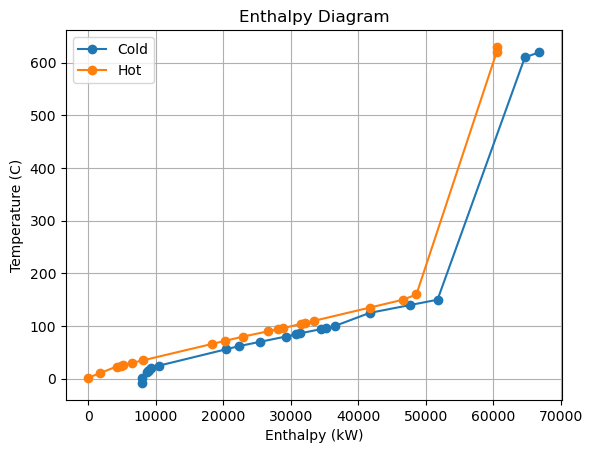

In [75]:
# Your existing plot commands
plt.plot(df_shifted_cold["Cumulative Utility [kW]"], df_shifted_cold['T_i '], "-o", label='Cold')
plt.plot(df_shifted_hot["Cumulative Utility [kW]"], df_shifted_hot['T_i'], "-o", label='Hot')

# Adding axis labels
plt.xlabel('Enthalpy (kW)')
plt.ylabel('Temperature (C)')

# Adding a title
plt.title('Enthalpy Diagram')

# Adding a legend (key)
plt.legend()

# Adding a grid
plt.grid(True)

# Display the plot
plt.show()
